<div style="line-height:1.2;">

<h1 style="color:#FF7C00; margin-bottom: 0.3em;">Classification in TensorFlow  </h1>

<h4 style="margin-top: 0.3em; margin-bottom: 1em;"> Two examples based on two different dataset (custom + mnist) with various model comparison each.</h4>

<div style="line-height:1.4; margin-bottom: 0.5em;">
    <h3 style="color: lightblue; display: inline; margin-right: 0.5em;">Keywords:</h3> 
    Notebook timestamp + jedi completion in Colab + make_column_transformer + IPython.display + pandas plot
</div>

</div>

In [ ]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [2]:
%config Completer.use_jedi = True

import random
import datetime
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.utils import plot_model
from tensorflow.keras.datasets import fashion_mnist

from sklearn.compose import make_column_transformer
from sklearn.datasets import make_circles
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

from IPython.display import display, HTML

In [3]:
print(f"Notebook last run (end-to-end): {datetime.datetime.now()}")

Notebook last run (end-to-end): 2023-07-07 11:17:03.083103


<h2 style="color:#FF7C00  "> <u> Classification example with custom data </u> </h2>

In [4]:
# Make 1000 examples
n_samples = 1000
## Create circles
X, y = make_circles(n_samples, noise=0.03, random_state=1)
X[:6]

array([[ 0.83619806,  0.03563148],
       [-0.53059757, -0.6487148 ],
       [ 0.85386881, -0.61156583],
       [-0.09214707, -0.9651441 ],
       [-1.00162344,  0.14446653],
       [ 0.47605284, -0.61169413]])

In [5]:
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
circles.head()

,X0,X1,label
0,0.836198,0.035631,1
1,-0.530598,-0.648715,1
2,0.853869,-0.611566,0
3,-0.092147,-0.965144,0
4,-1.001623,0.144467,0


In [6]:
# Different labels
circles.label.value_counts()

1    500
0    500
Name: label, dtype: int64

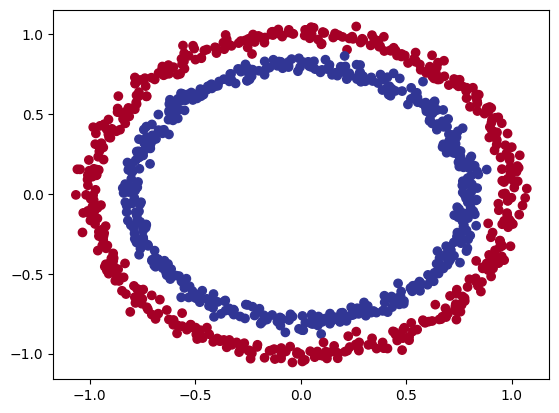

In [7]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

In [8]:
X.shape, y.shape

((1000, 2), (1000,))

In [9]:
len(X), len(y)

(1000, 1000)

<h3 style="color:#FF7C00  "> Model #1 </h3>
Binary loss + Stochastic Gradient Descent

In [10]:
tf.random.set_seed(42)
model_1 = tf.keras.Sequential([tf.keras.layers.Dense(1)])

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(), 
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 3ms/step - loss: 3.5646 - accuracy: 0.4730
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7706 - accuracy: 0.4940
Epoch 3/5
32/32 [==============================] - 0s 3ms/step - loss: 0.7121 - accuracy: 0.5020
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6999 - accuracy: 0.4930
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6959 - accuracy: 0.4850


In [11]:
## Train for longer
model_1.fit(X, y, epochs=200, verbose=0)    #verbose=0 removes training updates
model_1.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.4910


[0.6932551264762878, 0.4909999966621399]

<h3 style="color:#FF7C00  "> Model #2 </h3>
Adding an extra fully-connected layer

In [12]:
tf.random.set_seed(42)
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),       
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

model_2.fit(X, y, epochs=100, verbose=0)

In [13]:
# Evaluation
model_2.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5000


[0.6932458877563477, 0.5]

<h3 style="color:#FF7C00  "> Model #3 </h3>
Change the num of dense neurons for the first layer to 100 to first layer + add another layer with 10 neurons + Adam optimizer

In [14]:
"""
N.B.
---> Before TensorFlow 2.7.0
  tf.keras.layers.Dense(100),
---> With TensorFlow 2.7.0
  tf.keras.layers.Dense(100, input_shape=(None, 1)),
--> After TensorFlow 2.8.0
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
"""

tf.random.set_seed(42)
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),    
  tf.keras.layers.Dense(10),      
  tf.keras.layers.Dense(1)
])
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),       # use Adam instead of SGD
                metrics=['accuracy'])

# Train model for 100 data passes
model_3.fit(X, y, epochs=100, verbose=1) 

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 2.1236 - accuracy: 0.4720
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7046 - accuracy: 0.5130
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6962 - accuracy: 0.5070
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6945 - accuracy: 0.4620
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6977 - accuracy: 0.4780
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6950 - accuracy: 0.4990
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6975 - accuracy: 0.4680
Epoch 8/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6979 - accuracy: 0.4770
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6965 - accuracy: 0.4790
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6958 - accuracy: 0.4480
Epoch 11/

In [15]:
def plot_decision_boundary(model, X, y):
    """ Plots the decision boundary created by a model predicting on X. """
    
    # Define the axis boundaries of the plot and create a meshgrid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    # Get input values to predict, stacking 2D arrays together
    x_in = np.c_[xx.ravel(), yy.ravel()] 
    # Predictions using the trained model
    y_pred = model.predict(x_in)

    ######## Check the final dimension of the model's output shape => if this is > (greater than) 1, it's multi-class!
    if model.output_shape[-1] > 1: 
        print("doing multiclass classification...")
        # Reshape our predictions to get them ready for plotting
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)  
    else:
        print("doing binary classifcation...")
        y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

    #### Display the decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


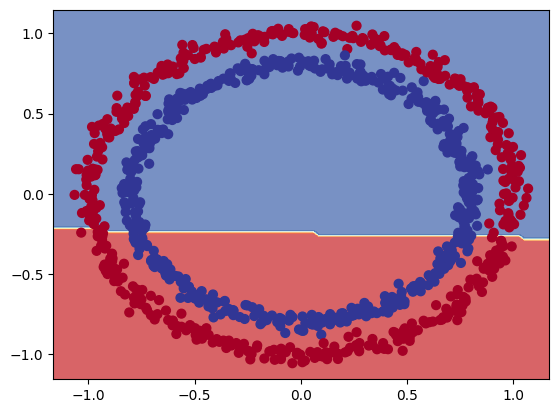

In [16]:
plot_decision_boundary(model_3, X, y)

In [17]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               300       
                                                                 
 dense_4 (Dense)             (None, 10)                1010      
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,321
Trainable params: 1,321
Non-trainable params: 0
_________________________________________________________________


In [18]:
""" Split dataset in two parts.
- 80% of the data for the training set
- 20% of the data for the test set
"""
X_train, y_train = X[:800], y[:800] 
X_test, y_test = X[800:], y[800:] 

print(f"len(X) {len(X)}")
print(f"len(X_train) {len(X_train)}")
print(f"len(X_test) {len(X_test)}")
print(f"len(y) {len(y)}")
print(f"len(y_train) {len(y_train)}")
print(f"len(y_test) {len(y_test)}")
print(f"X_train.shape {X_train.shape}")
print(f"X_test.shape {X_test.shape}")
print(f"y_train.shape {y_train.shape}")
print(f"y_test.shape {y_test.shape}")

len(X) 1000
len(X_train) 800
len(X_test) 200
len(y) 1000
len(y_train) 800
len(y_test) 200
X_train.shape (800, 2)
X_test.shape (200, 2)
y_train.shape (800,)
y_test.shape (200,)


<h3 style="color:#FF7C00  "> Model #4 </h3>
Use "relu" activation functions for the first and second layer + "sigmoid" for the third + increase learning rate from 0.001 to 0.01 for faster learning

In [19]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),    # using "relu" is the same to use tf.keras.activations.relu
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")  # output layer, using 'sigmoid' for the output
])

model_4.compile(loss=tf.keras.losses.binary_crossentropy,
            optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), 
            metrics=['accuracy'])

history = model_4.fit(X_train, y_train, epochs=25, verbose=0)

313/313 [==============================] - 2s 4ms/step
doing binary classifcation...
313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


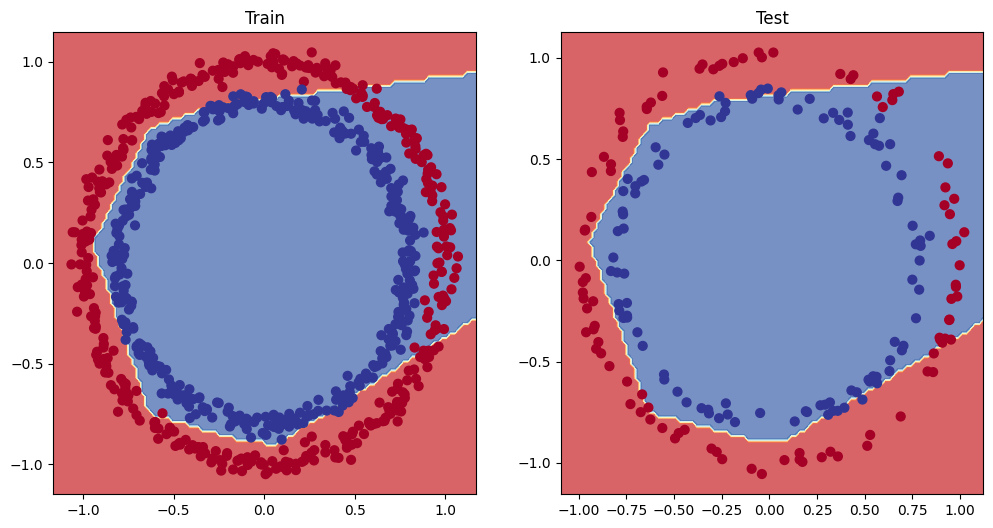

In [20]:
""" Display decision_boundaries for both sets """
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_4, X=X_test, y=y_test)
plt.show()

In [21]:
dat = pd.DataFrame(history.history)
dat[:10]

,loss,accuracy
0,0.696680,0.48500
1,0.693512,0.47375
2,0.691199,0.47375
3,0.689606,0.51250
4,0.687883,0.50750
5,0.685422,0.51625
6,0.682870,0.52125
7,0.679540,0.52875
8,0.677156,0.53000
9,0.671691,0.55750


Text(0.5, 1.0, 'Model_8 training curves')

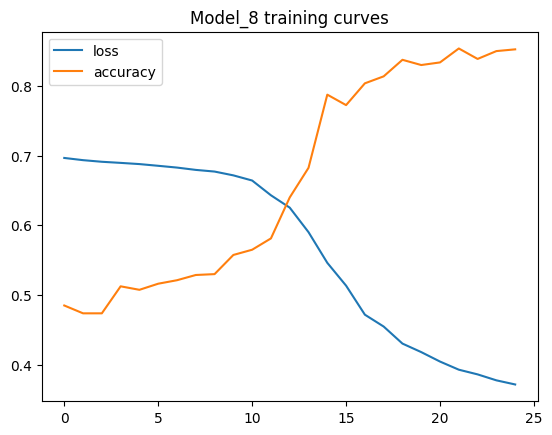

In [22]:
pd.DataFrame(history.history).plot()
plt.title("Model_4 training curves")

<h3 style="color:#FF7C00  "> Model #5 </h3>
To find the best learning rate to use, one solution is to add a callback (an extra piece of functionality to add to the model while its training)

In [ ]:
tf.random.set_seed(22)

model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])
model_5.compile(loss = "binary_crossentropy",           # we can use strings
                optimizer = "Adam",                     # same as tf.keras.optimizers.Adam() with default settings
                metrics = ["accuracy"])

In [23]:
""" Create a learning rate scheduler callback """

# Traverse a set of learning rate values starting from 1e-4, increasing by 10**(epoch/20) every epoch
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

#### Train, passing the lr_scheduler callback
results_fit_model9 = model_5.fit(X_train,
                      y_train,
                      epochs=100,
                      callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 4ms/step - loss: 0.7177 - accuracy: 0.5013 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 4ms/step - loss: 0.7167 - accuracy: 0.4988 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7158 - accuracy: 0.4963 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 4ms/step - loss: 0.7145 - accuracy: 0.4975 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 0.7134 - accuracy: 0.4975 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 4ms/step - loss: 0.7120 - accuracy: 0.4975 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7108 - accuracy: 0.4925 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7094 - accuracy: 0.4925 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 4ms/step - loss:

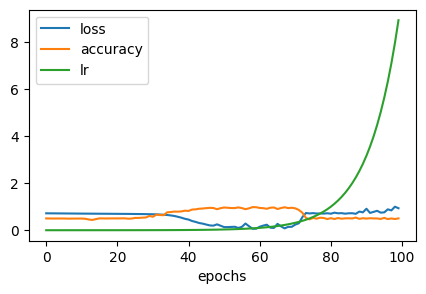

In [24]:
pd.DataFrame(results_fit_model5.history).plot(figsize=(5,3), xlabel="epochs");

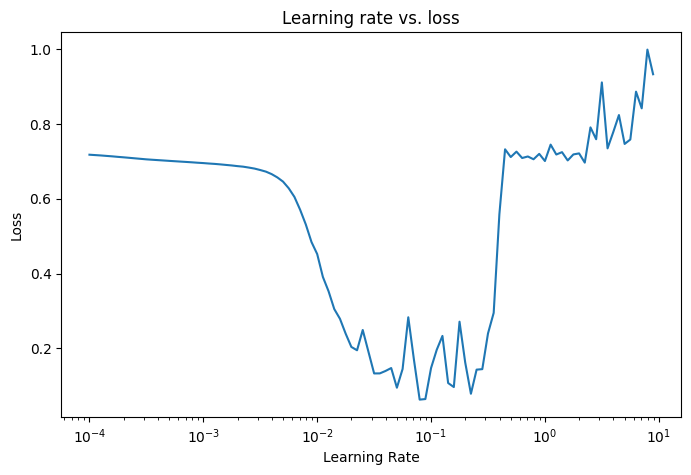

In [27]:
""" Display the loss versus the log-scale learning rate, in order to figure out where this infliction point is.
N.B.
Example of other typical learning rate values are = [10**0, 10**-1, 10**-2, 10**-3, 1e-4]
"""
lrs = 1e-4 * (10 ** (np.arange(100)/20))
plt.figure(figsize=(8, 5))
plt.semilogx(lrs, results_fit_model9.history["loss"])   # the x-axis (learning rate) to be log scale
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss");

<h3 style="color:#FF7C00  "> Model #6 </h3>
Choosing another learning rate = 0.02

In [28]:
"""
N.B.
To adjust the learning rate, it is necessary to use 'tf.keras.optimizers.Adam'.
(not just the string "Adam" like in the above example)
"""

tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])
model_6.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.02), 
                metrics = ["accuracy"])

history = model_6.fit(X_train, y_train, epochs=20)

Epoch 1/20
25/25 [==============================] - 1s 2ms/step - loss: 0.6855 - accuracy: 0.5587
Epoch 2/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6669 - accuracy: 0.6375
Epoch 3/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6478 - accuracy: 0.6237
Epoch 4/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5789 - accuracy: 0.7862
Epoch 5/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4980 - accuracy: 0.8462
Epoch 6/20
25/25 [==============================] - 0s 3ms/step - loss: 0.3720 - accuracy: 0.9675
Epoch 7/20
25/25 [==============================] - 0s 2ms/step - loss: 0.2663 - accuracy: 0.9750
Epoch 8/20
25/25 [==============================] - 0s 2ms/step - loss: 0.1884 - accuracy: 0.9875
Epoch 9/20
25/25 [==============================] - 0s 2ms/step - loss: 0.1378 - accuracy: 0.9862
Epoch 10/20
25/25 [==============================] - 0s 3ms/step - loss: 0.1109 - accuracy: 0.9862
Epoch 11/20
25/25 [

In [29]:
model_6.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0506 - accuracy: 0.9750


[0.05059308931231499, 0.9750000238418579]

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...
313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


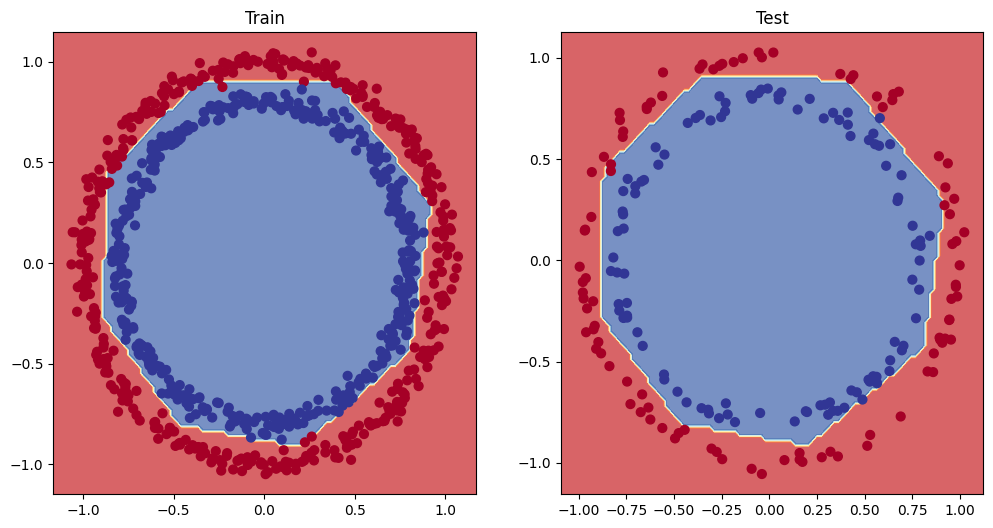

In [30]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_6, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_6, X=X_test, y=y_test)
plt.show()

In [31]:
%%script echo Skipping, just for Colab
from IPython.display import HTML, display

def color_text(s, color):
    #display(HTML("<text style=color:{}>{}</text>".format(color, s)))
    display(HTML("<text style='color:{}; font-size:{}px'>{}</text>".format(color, 35, s)))

color_text("Evaluation methods for classification", "green")

<h2 style="color:#FF7C00  "> Evaluation methods for classification </h2>

| Metric name/Evaluation method | Defintion
|----------|----------|
|   Accuracy     |   Out of 100 predictions, how many does the model get correct? E.g. 95% accuracy means it gets 95/100 predictions correct.     |
|   Precision     |   Proportion of true positives over total number of samples. Higher precision leads to less false positives (model predicts 1 when it should've been 0).     |
|   Recall     |   Proportion of true positives over total number of true positives and false negatives (model predicts 0 when it should've been 1). Higher recall leads to less false negatives    |
|   F1-score     |  Combines precision and recall into one metric. 1 is best, 0 is worst.    |
|   Confusion Matrix     |  Compares the predicted values with the true values in a tabular way, if 100% correct, all values in the matrix will be top left to bottom right (diagnol line).    |
|   Classification report	     |  Collection of some of the main classification metrics.   |


In [32]:
""" Accuracy """
loss, accuracy = model_6.evaluate(X_test, y_test)
print(f"Model loss on test set: {loss}")
print(f"Model accuracy on test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 3ms/step - loss: 0.0506 - accuracy: 0.9750
Model loss on test set: 0.05059308931231499
Model accuracy on test set: 97.50%


In [33]:
%%script echo Skipping. This lead to "ValueError: Classification metrics can't handle a mix of binary and continuous targets" 
y_preds = model_6.predict(X_test)
confusion_matrix(y_test, y_preds)

skipping


In [38]:
y_preds = model_6.predict(X_test)
print(y_test[:10])
print()
print(y_preds[:10])

7/7 [==============================] - 0s 4ms/step
[1 1 1 0 1 1 1 1 1 0]

[[0.9994783 ]
 [0.999535  ]
 [0.99838626]
 [0.574239  ]
 [0.9719626 ]
 [0.9360428 ]
 [0.966542  ]
 [0.9970965 ]
 [0.972392  ]
 [0.01622684]]


In [ ]:
# Prediction need to be converted into probabilities to binary format and view the first 10
tf.round(y_preds)[:10]

In [39]:
""" Now it works! """
confusion_matrix(y_test, tf.round(y_preds))

array([[ 94,   3],
       [  2, 101]])

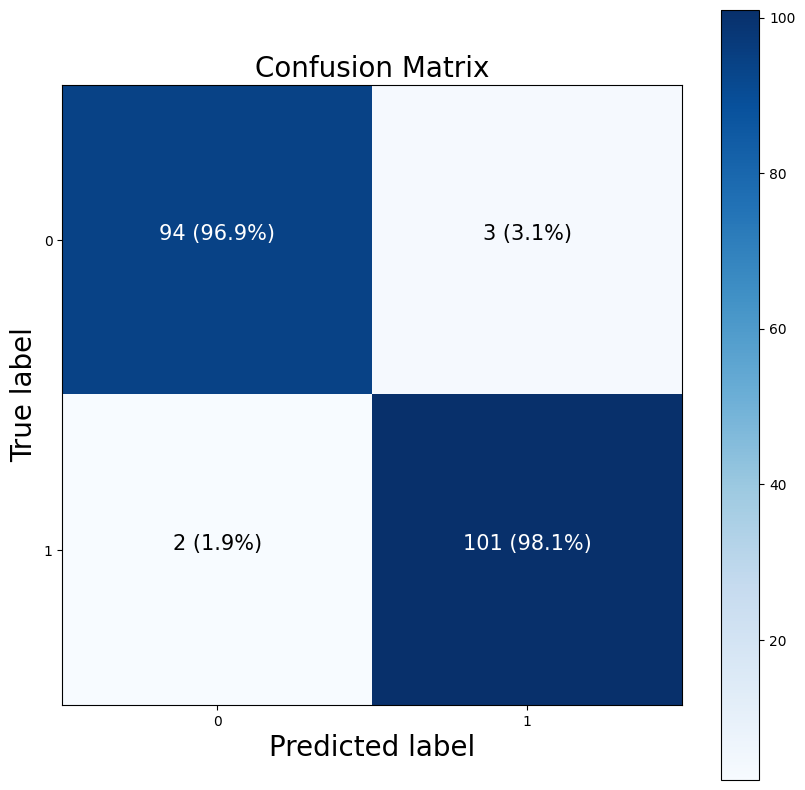

In [40]:
""" Plot Confusion Matrix in a fancier way, without the need of sklearn ConfusionMatrixDisplay library """
figsize = (10, 10)

### Confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]  #normalize it
n_classes = cm.shape[0]

### Define figure characteristics
fig, ax = plt.subplots(figsize=figsize)
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

classes = False
if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

####### Labels
ax.set(title="Confusion Matrix",
        xlabel="Predicted label",
        ylabel="True label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

## Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

## Adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

## Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

##### Specify the content that is written cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=15)

In [41]:
""" 
N.B.
The product function returns the Cartesian product of the set of all possible pairs of row and column indices in the confusion matrix.
The range function is used to generate a sequence of integers from 0 to the number of rows/columns in the confusion matrix.
"""
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    print(i, j)

0 0
0 1
1 0
1 1


**-------------------------------------------------------------------------------------------------------------------------------------------------------------**

In [42]:
%%script echo Skipping. Just for Colab
#from IPython.display import display, HTML
def color_text(s, color):
    display(HTML("<text style='color:{}; font-size:{}px'>{}</text>".format(color, 35, s)))

color_text("----> EXAMPLE CLASSIFICATION with fashion_mnist DATASET: ", "orange")

In [ ]:
%% script echo Skipping. Just for Colab, colored html text example
def color_text(s, color):
    colors = {
        'red': '#ff0000',
        'green': '#00ff00',
        'blue': '#0000ff',
        'purple': '#800080',
        'orange': '#ffa500',
        'yellow': '#ffff00',
        'gray': '#808080',
        'black': '#000000',
        'pink': '#ff69b4',
        'brown': '#a52a2a',
        'navy': '#000080',
        'teal': '#008080',
        'maroon': '#800000',
        'olive': '#808000',
        'lime': '#00ff00',
        'aqua': '#00ffff',
        'fuchsia': '#ff00ff',
        'silver': '#c0c0c0',
        'white': '#ffffff',
        'indigo': '#4b0082',
        'turquoise': '#40e0d0',
        'coral': '#ff7f50',
        'gold': '#ffd700',
        'khaki': '#f0e68c',
        'lavender': '#e6e6fa',
        'magenta': '#ff00ff',
        'plum': '#dda0dd',
        'tan': '#d2b48c',
        'violet': '#ee82ee'
    }
    if color in colors:
        color_code = colors[color]
    else:
        color_code = color
    display(HTML("<text style='color:{}; font-size:{}px'>{}</text>".format(color_code, 15, s)))

color_text("just trying colours", "plum")    

<h2 style="color:#FF7C00  "> <u> Another Classification example with fashion_mnist dataset </u> </h2>

In [45]:
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [46]:
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label: {train_labels[0]}")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [47]:
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [48]:
train_data[0].shape, train_labels[0].shape

((28, 28), ())

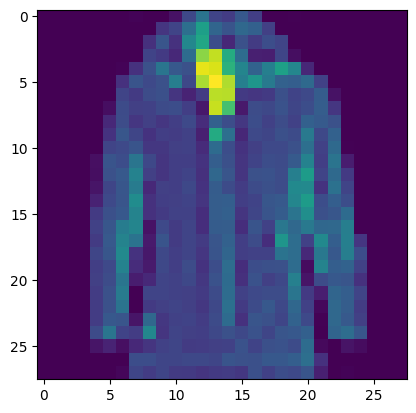

In [49]:
# Show a single example
plt.imshow(train_data[19]);

In [50]:
# Check the label of depicted sample
train_labels[19]

4

In [51]:
""" Create a small list of the class names """

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

len(class_names)

10

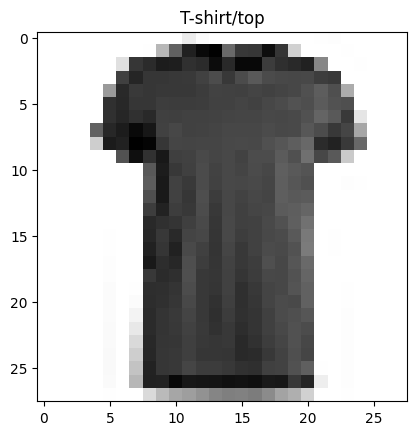

In [52]:
""" Show an example image and its label, changing the colours to black & white """
plt.imshow(train_data[17], cmap=plt.cm.binary)
plt.title(class_names[train_labels[17]]);

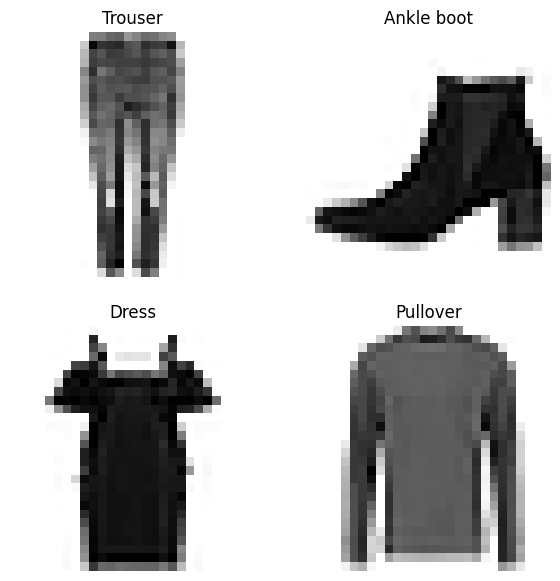

In [53]:
""" Visualize multiple random images of fashion MNIST """
plt.figure(figsize=(7, 7))
for i in range(4):
    ax = plt.subplot(2, 2, i + 1)
    rand_index = random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[rand_index]])
    plt.axis(False)

<h3 style="color:#FF7C00  "> Model #1 </h3>

In [54]:
tf.random.set_seed(89)

###### NN model definition
model_nn_mnist = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),    # input layer reshape 28x28 to 784 (the Flatten layer does this for us)
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")   # output shape is 10, activation is softmax
])

### Compile 
model_nn_mnist.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # different loss function for multiclass classifcation!
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["accuracy"])

#### Train
non_norm_history = model_nn_mnist.fit(train_data,
                        train_labels,
                        epochs = 10,
                        validation_data = (test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3313 - accuracy: 0.1009 - val_loss: 2.3025 - val_accuracy: 0.1001
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3027 - accuracy: 0.0997 - val_loss: 2.3024 - val_accuracy: 0.1001
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3027 - accuracy: 0.0985 - val_loss: 2.3024 - val_accuracy: 0.1001
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0937 - val_loss: 2.3024 - val_accuracy: 0.1001
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3027 - accuracy: 0.1001 - val_loss: 2.3024 - val_accuracy: 0.1001
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3027 - accuracy: 0.0990 - val_loss: 2.3024 - val_accuracy: 0.1001
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3027 - accuracy: 0.0978 - val_loss: 2.3024 - val_accuracy:

In [55]:
model_nn_mnist.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_18 (Dense)            (None, 4)                 3140      
                                                                 
 dense_19 (Dense)            (None, 4)                 20        
                                                                 
 dense_20 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


<h3 style="color:#FF7C00  "> Model #2 </h3>

In [56]:
""" Test another model after Scaling (normalization) data...
N.B.
Get min and max with values between 0 and 1.
the entire array should be divivded by the maximum: 255.0 (dividing by a float also converts to a float)."""

## Min and Max values of the training data
print("train min")
print(train_data.min())
print("train max")
print(train_data.max())

## Normalization, divide train and test images by the maximum value
train_data = train_data / 255.0
test_data = test_data / 255.0

train_data.min(), train_data.max()

train min
0
train max
255


(0.0, 1.0)

In [57]:
tf.random.set_seed(89)  # use same seed as before!

##### Model definition after Standarization
model_std = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),    # input layer (to be reshaped from 28x28 to 784)
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")   # output shape is 10, activation is softmax
])

### Compile
model_std.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

#### Fit
norm_history = model_std.fit(train_data,
                            train_labels,
                            epochs = 10,
                            validation_data = (test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 1.4960 - accuracy: 0.4574 - val_loss: 0.9505 - val_accuracy: 0.6551
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8326 - accuracy: 0.6951 - val_loss: 0.7611 - val_accuracy: 0.7371
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6961 - accuracy: 0.7596 - val_loss: 0.6965 - val_accuracy: 0.7559
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6558 - accuracy: 0.7724 - val_loss: 0.6901 - val_accuracy: 0.7590
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6343 - accuracy: 0.7792 - val_loss: 0.6651 - val_accuracy: 0.7687
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6169 - accuracy: 0.7856 - val_loss: 0.6457 - val_accuracy: 0.7779
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6019 - accuracy: 0.7893 - val_loss: 0.6358 - val_accuracy:

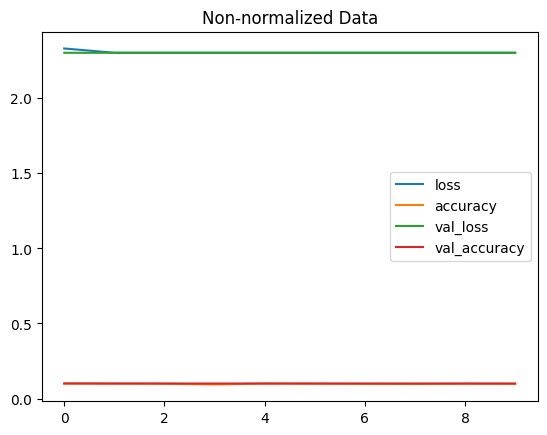

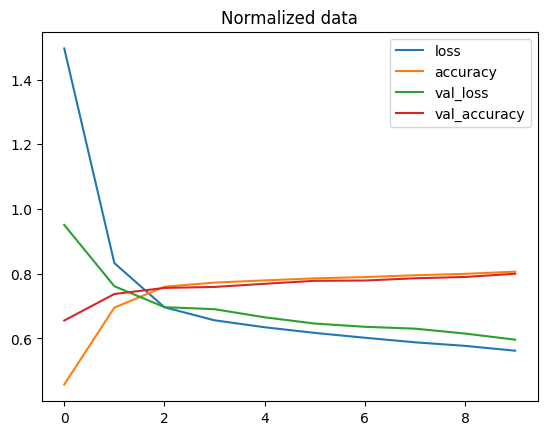

In [58]:
""" Display loss with pandas """
pd.DataFrame(non_norm_history.history).plot(title = "Non-normalized Data")    #non-normalized data loss curves
pd.DataFrame(norm_history.history).plot(title = "Normalized data");           #normalized data loss curves

<h3 style="color:#FF7C00  "> Model #3  </h3>
Finding the ideal learning rate

In [ ]:
""" 
N.B. 
The number of epochs is less than 100. 
The model already perform well with current LR, probably there is no need to exploit many epochs. """
tf.random.set_seed(89)

model_nn = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),      
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")     
])

model_nn.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

In [59]:
find_lr_history = model_nn.fit(train_data, train_labels, epochs=40, 
                            validation_data=(test_data, test_labels), callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 8s 4ms/step - loss: 1.8586 - accuracy: 0.2360 - val_loss: 1.6568 - val_accuracy: 0.2960 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5682 - accuracy: 0.3095 - val_loss: 1.5120 - val_accuracy: 0.3395 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 5s 3ms/step - loss: 1.4703 - accuracy: 0.3376 - val_loss: 1.4472 - val_accuracy: 0.3265 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 6s 3ms/step - loss: 1.4187 - accuracy: 0.3528 - val_loss: 1.4103 - val_accuracy: 0.3585 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 5s 3ms/step - loss: 1.3866 - accuracy: 0.3654 - val_loss: 1.3938 - val_accuracy: 0.3535 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 5s 3ms/step - loss: 1.3644 - accuracy: 0.3763 - val_loss: 1.3783 - val_accuracy: 0.3625 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 6s

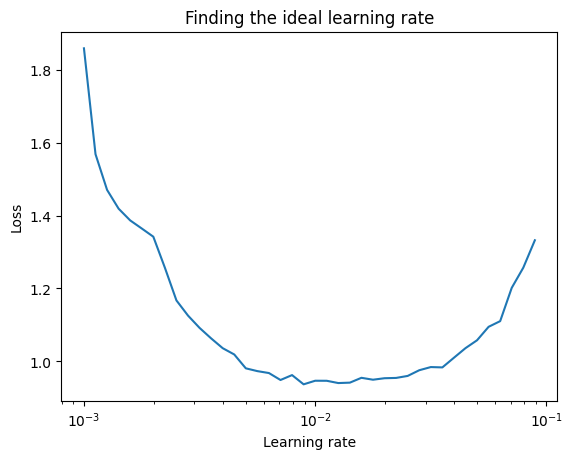

In [60]:
""" Display the learning rate decay curve, to see the ideal learning rate... 
in this case it is close to the default learning rate of the Adam optimizer (0.001). """

lrs = 1e-3 * (10**(np.arange(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"])  #x-axis in log-scale
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");

<h3 style="color:#FF7C00  "> Model #4  </h3>

In [61]:
tf.random.set_seed(89)

model_final = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),          
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")         
])

## Compile with ideal learning rate
model_final.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                  optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),       #lr attribute is deprecated! 
                  metrics=["accuracy"])

history_final = model_final.fit(train_data, train_labels, epochs=20, validation_data=(test_data, test_labels))

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 1.3146 - accuracy: 0.4965 - val_loss: 0.9642 - val_accuracy: 0.6452
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8803 - accuracy: 0.6749 - val_loss: 0.8380 - val_accuracy: 0.6945
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7949 - accuracy: 0.7086 - val_loss: 0.7846 - val_accuracy: 0.7071
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7504 - accuracy: 0.7247 - val_loss: 0.7640 - val_accuracy: 0.7234
Epoch 5/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.7223 - accuracy: 0.7344 - val_loss: 0.7383 - val_accuracy: 0.7251
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7021 - accuracy: 0.7412 - val_loss: 0.7217 - val_accuracy: 0.7406
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6855 - accuracy: 0.7480 - val_loss: 0.7163 - val_accuracy:

<h2 style="color:#FF7C00  "> Custom confusion matrix  </h2>

In [62]:
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
    """ Make a labelled Confusion Matrix comparing predictions and ground truth labels.
    
    Details:
        - If a classes is passed, the confusion matrix will be labelled, if not, it is an integer class.
        - Colors to represent how 'correct' a class is, darker == better

    Parameters:
        - y_true: Array of truth labels (must be same shape as y_pred).
        - y_pred: Array of predicted labels (must be same shape as y_true).
        - classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
        - figsize: Size of output figure (default=(10, 10)).
        - text_size: Size of output figure text (default=15).

    Returns:
        Labelled confusion matrix plot to compare y_true and y_pred.

    Example usage:
                  make_confusion_matrix(y_true=test_labels, # ground truth test labels
                            y_pred=y_preds, # predicted labels
                            classes=class_names, # array of class label names
                            figsize=(15, 15),
                            text_size=10)
    """

    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]      #normalization
    n_classes = cm.shape[0]                                           #find the number of classes

    ## Plot the figure
    fig, ax = plt.subplots(figsize=figsize)
    cax = ax.matshow(cm, cmap=plt.cm.Blues)
    fig.colorbar(cax)

    if classes:
      labels = classes
    else:
      labels = np.arange(cm.shape[0])

    ## Labels
    ax.set(title="Confusion Matrix",
        xlabel="Predicted label",
        ylabel="True label",
        xticks=np.arange(n_classes),             #enough axis slots for each class
        yticks=np.arange(n_classes),
        xticklabels=labels,                      #axes labeled with class names (if they exist) or ints
        yticklabels=labels)

    ## Make x-axis labels appear on bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

    ## Set the threshold for different colors
    threshold = (cm.max() + cm.min()) / 2.

    ## Plot the text on each cell
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=text_size)

In [63]:
# Make predictions
y_probs = model_final.predict(test_data)

print(model_final.layers)
y_probs[:5]

313/313 [==============================] - 1s 1ms/step
[<keras.layers.reshaping.flatten.Flatten object at 0x7f62f80583d0>, <keras.layers.core.dense.Dense object at 0x7f62f0ab52a0>, <keras.layers.core.dense.Dense object at 0x7f62f0ab5a20>, <keras.layers.core.dense.Dense object at 0x7f62f0ad8dc0>]


array([[9.70176984e-07, 5.26479198e-08, 9.83367045e-07, 1.35321228e-04,
        1.86005927e-05, 2.62516588e-01, 1.94857353e-06, 3.58815134e-01,
        1.69621466e-03, 3.76814216e-01],
       [2.09434191e-03, 1.03469255e-09, 7.75677085e-01, 8.59110587e-05,
        1.22161016e-01, 1.89223615e-09, 9.99813378e-02, 1.82638493e-15,
        3.05991534e-07, 2.19167996e-14],
       [7.71119841e-04, 9.98574495e-01, 2.10692419e-09, 6.53315336e-04,
        4.56133187e-11, 2.10380785e-13, 1.10439476e-06, 4.53570430e-26,
        1.53937089e-11, 6.70219570e-23],
       [4.62770768e-05, 9.98659730e-01, 2.77075828e-11, 1.29389332e-03,
        1.09701206e-11, 2.52337561e-12, 4.51725057e-08, 3.39626645e-23,
        1.38538105e-11, 1.34148468e-19],
       [2.44089857e-01, 6.28750829e-04, 1.72277942e-01, 2.24277731e-02,
        2.02272348e-02, 9.30708666e-07, 5.39909422e-01, 3.67616128e-14,
        4.38122486e-04, 1.20130956e-12]], dtype=float32)

In [64]:
# Predicted class number and label for the first sample
y_probs[0].argmax(), class_names[y_probs[0].argmax()]

(9, 'Ankle boot')

In [65]:
# Convert all of the predictions from probabilities to labels
y_preds = y_probs.argmax(axis=1)

# View the first 10 prediction labels
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 4, 5, 7])

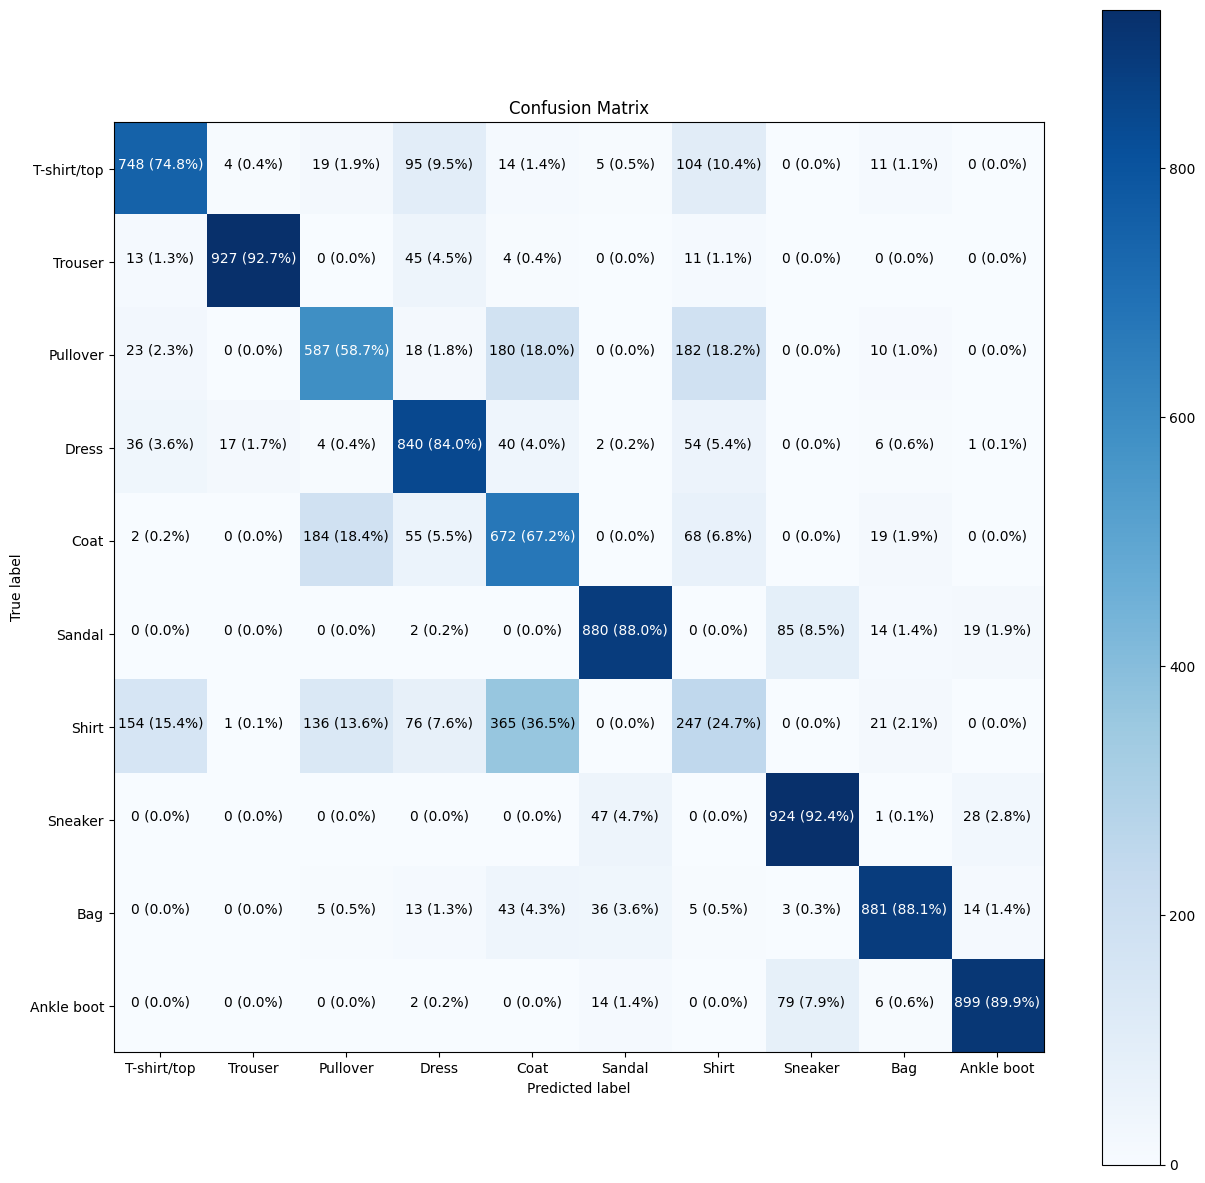

In [66]:
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

In [67]:
weights, biases = model_final.layers[1].get_weights()

## Shape = 1 weight matrix the size of our input data (28x28) per neuron (4)
print(weights)
print(weights.shape)
## Shape = 1 bias per neuron (4 neurons in the first layer)
print(biases)
print(biases.shape)

[[-2.3708129e-01 -5.2226119e-02 -4.8977068e-01  6.6211969e-01]
 [-2.1926965e-01 -8.5639738e-02 -1.1488689e+00  1.0264333e+00]
 [-1.0769749e+00  7.9750031e-02 -6.7619330e-01  1.2690434e+00]
 ...
 [-1.6219747e-01 -5.9194479e-02 -5.1118749e-01 -3.5234073e-01]
 [-1.2458259e-01 -1.2193382e-03 -9.3598634e-02 -2.5884423e-01]
 [ 1.9155006e-01  6.7813784e-02  4.5107019e-01  1.3935938e-01]]
(784, 4)
[-0.5612808  -0.02795939 -1.125571    2.207446  ]
(4,)


In [68]:
model_final.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_27 (Dense)            (None, 4)                 3140      
                                                                 
 dense_28 (Dense)            (None, 4)                 20        
                                                                 
 dense_29 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________
